<a href="https://colab.research.google.com/github/arshina-azam/Beginner-Friendly/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Number of rows: 5572
Number of columns: 5

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-nul

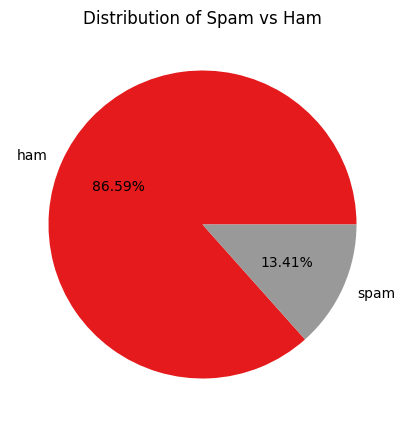

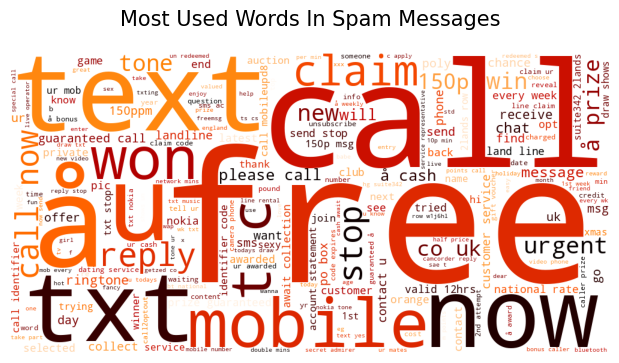


Train ROC AUC: 0.9955356167729354
Test ROC AUC: 0.9714089083638962


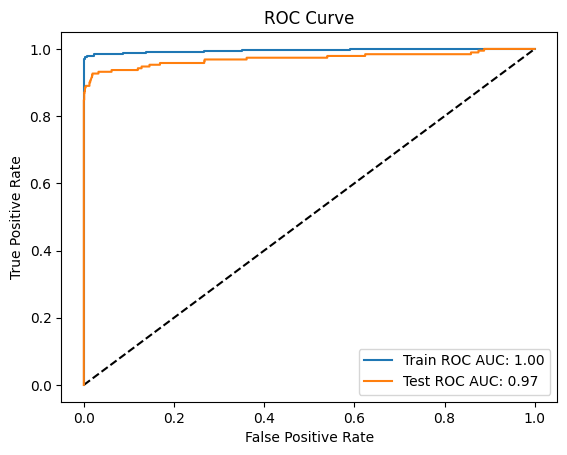

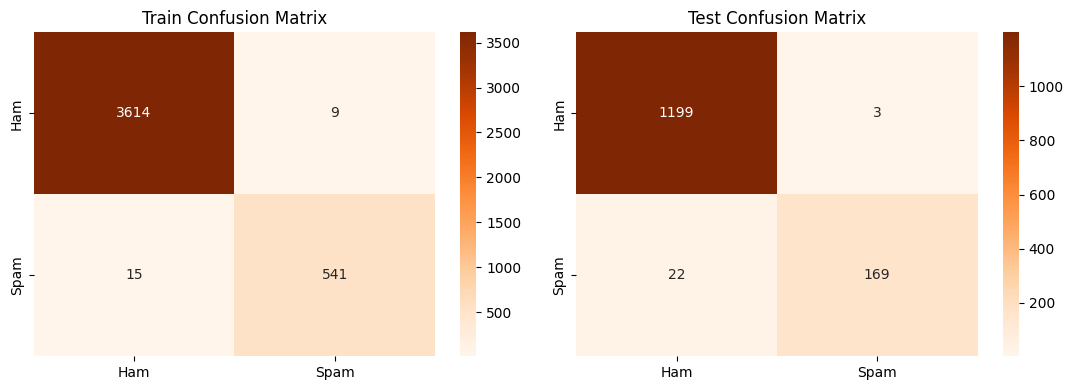


Train Classification Report:
                0       1  accuracy  macro avg  weighted avg
precision     1.0    0.98      0.99       0.99          0.99
recall        1.0    0.97      0.99       0.99          0.99
f1-score      1.0    0.98      0.99       0.99          0.99
support    3623.0  556.00      0.99    4179.00       4179.00

Test Classification Report:
                 0       1  accuracy  macro avg  weighted avg
precision     0.98    0.98      0.98       0.98          0.98
recall        1.00    0.88      0.98       0.94          0.98
f1-score      0.99    0.93      0.98       0.96          0.98
support    1202.00  191.00      0.98    1393.00       1393.00
This is a Spam Email!


In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

# Dataset First Look
print("First 5 rows:")
print(df.head())

# Dataset Rows & Columns count
print("\nNumber of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Dataset Info
print("\nDataset info:")
print(df.info())

# Dataset Duplicate Value Count
print("\nNumber of duplicated rows:", df.duplicated().sum())

# Missing Values/Null Values Count
print("\nMissing values per column:")
print(df.isnull().sum())

# Rename columns
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

# Drop unnecessary columns
columns_to_drop = [col for col in df.columns if col.startswith('Unnamed')]
df.drop(columns=columns_to_drop, inplace=True)

# Create binary 'Spam' column
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Visualize distribution
plt.figure(figsize=(5,5))
df['Category'].value_counts().plot(kind='pie', autopct='%1.2f%%', cmap='Set1')
plt.title('Distribution of Spam vs Ham')
plt.ylabel('')
plt.show()

# WordCloud for spam messages
df_spam = df[df['Category']=='spam'].copy()
comment_words = ' '.join(df_spam['Message'].astype(str).str.lower().values)

wordcloud = WordCloud(width=1000, height=500,
                     background_color='white',
                     stopwords=STOPWORDS,
                     min_font_size=10,
                     max_words=1000,
                     colormap='gist_heat_r').generate(comment_words)

plt.figure(figsize=(6,6))
plt.title('Most Used Words In Spam Messages', fontsize=15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Spam'], test_size=0.25, random_state=42)

# Create pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Train model
clf.fit(X_train, y_train)

# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # Calculate metrics
    roc_auc_train = roc_auc_score(y_train, pred_prob_train)
    roc_auc_test = roc_auc_score(y_test, pred_prob_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # Plot ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label=f"Train ROC AUC: {roc_auc_train:.2f}")
    plt.plot(fpr_test, tpr_test, label=f"Test ROC AUC: {roc_auc_test:.2f}")
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # Confusion matrices
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    sns.heatmap(cm_train, annot=True,
                xticklabels=['Ham', 'Spam'],
                yticklabels=['Ham', 'Spam'],
                cmap="Oranges", fmt='g', ax=ax[0])
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True,
                xticklabels=['Ham', 'Spam'],
                yticklabels=['Ham', 'Spam'],
                cmap="Oranges", fmt='g', ax=ax[1])
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    # Classification reports
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)

    print("\nTrain Classification Report:")
    print(pd.DataFrame(cr_train).round(2))

    print("\nTest Classification Report:")
    print(pd.DataFrame(cr_test).round(2))

    # Return metrics
    metrics = {
        'precision_train': cr_train['weighted avg']['precision'],
        'precision_test': cr_test['weighted avg']['precision'],
        'recall_train': cr_train['weighted avg']['recall'],
        'recall_test': cr_test['weighted avg']['recall'],
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred_test),
        'roc_auc_train': roc_auc_train,
        'roc_auc_test': roc_auc_test,
        'f1_train': cr_train['weighted avg']['f1-score'],
        'f1_test': cr_test['weighted avg']['f1-score']
    }

    return metrics

# Evaluate model
metrics = evaluate_model(clf, X_train, X_test, y_train, y_test)

# Spam detection function
def detect_spam(email_text):
    prediction = clf.predict([email_text])[0]
    return "This is a Spam Email!" if prediction == 1 else "This is a Ham Email!"

# Example usage
sample_email = 'Free Tickets for IPL'
print(detect_spam(sample_email))